In [64]:
import pandas as pd
import numpy as np 


In [65]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")


In [66]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
df.shape


(5572, 5)

In [68]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


## 1. DATA CLEANING

In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [70]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [71]:
# renaming the columns 

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
4092,ham,"\Life is nothing wen v get everything\"". But \..."
2496,ham,HCL chennai requires FRESHERS for voice proces...
2137,ham,Then why you came to hostel.
5538,ham,I can't believe how attached I am to seeing yo...
2449,ham,Then she dun believe wat?


In [72]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])


In [73]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
# missing values

df.isnull().sum()


target    0
text      0
dtype: int64

In [75]:
# check duplicate values

df.duplicated().sum()


403

In [76]:
# remove duplicate values

df = df.drop_duplicates(keep='first')


In [77]:
df.duplicated().sum()


0

## 2. EDA

In [78]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x293950390>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

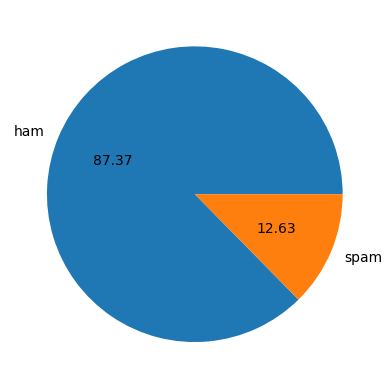

In [79]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")


In [80]:
# Data is imbalanced


In [81]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/ravirahar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
df['num_characters'] = df['text'].apply(len)


In [83]:
# num of words

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [84]:
# num sentences 

df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [85]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [89]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

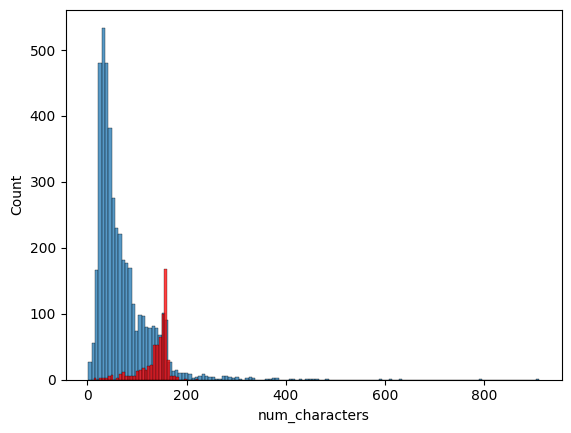

In [90]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

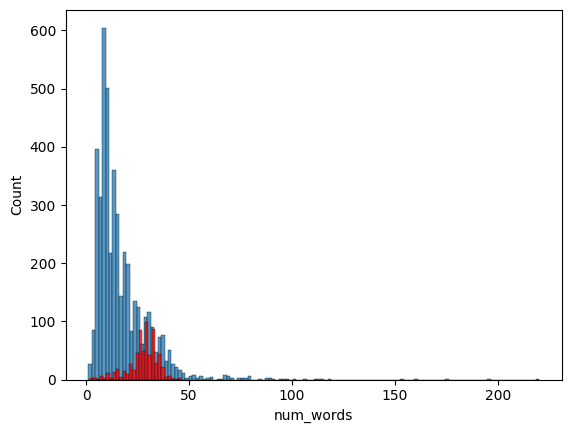

In [91]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')


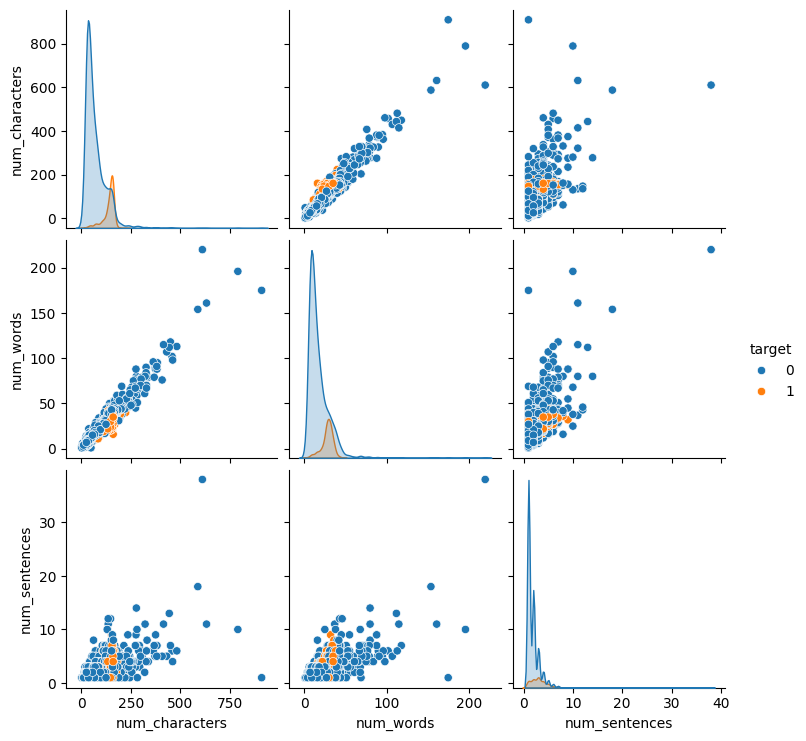

In [92]:
sns.pairplot(df,hue = 'target')


<Axes: >

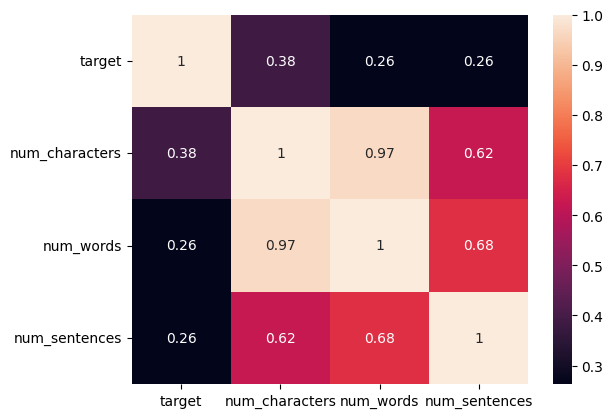

In [93]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot = True)


## 3. TEXT PREPROCESSING

* Lower Case
* Tokenization
* Removing special characters
* Removing stop words
* Stemming

In [94]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string 
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [95]:
df['transformed_text'] = df['text'].apply(transform_text)


In [99]:
from wordcloud import WordCloud

wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')


In [104]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))


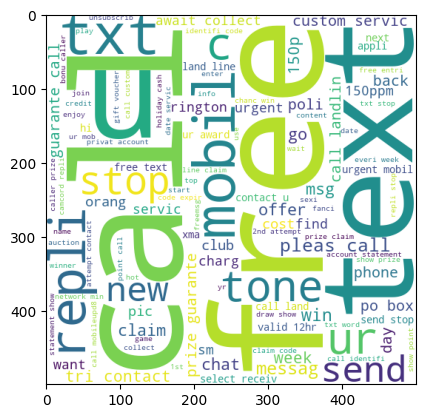

In [105]:
plt.imshow(spam_wc)


In [106]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))


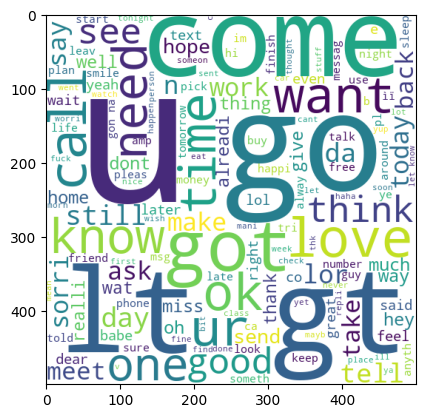

In [107]:
plt.imshow(ham_wc)


In [113]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [114]:
len(spam_corpus)


9939

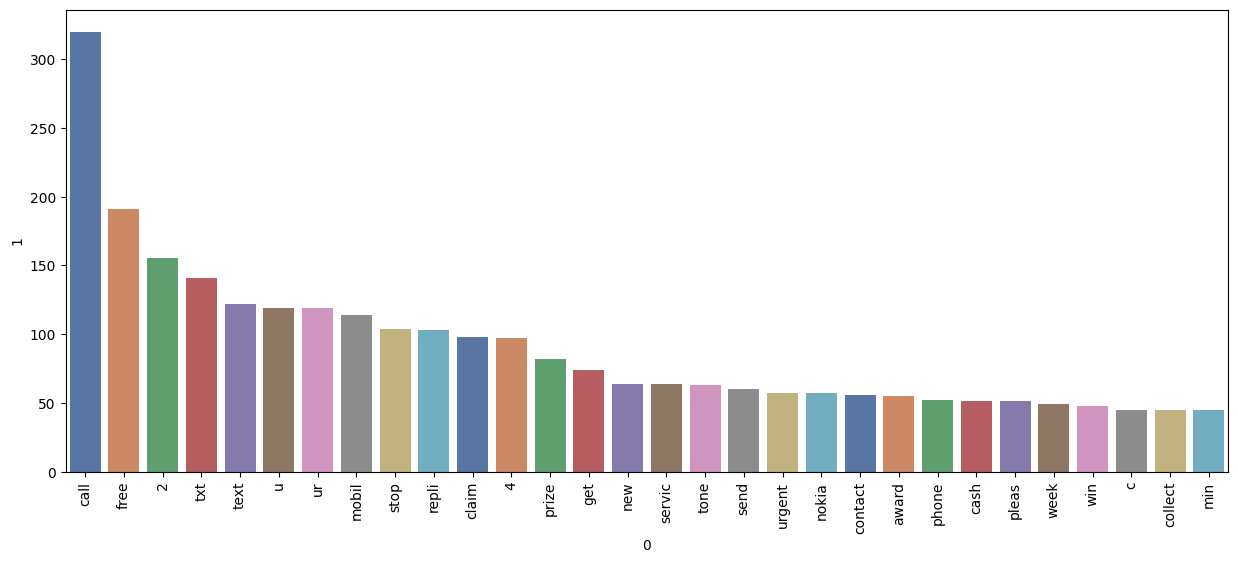

In [127]:
from collections import Counter

spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize = (15,6))
sns.barplot(data=spam_df,x=spam_df[0],y=spam_df[1],palette = 'deep',hue=spam_df[0])
plt.xticks(rotation = 'vertical')
plt.show()


In [128]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [129]:
len(ham_corpus)


35404

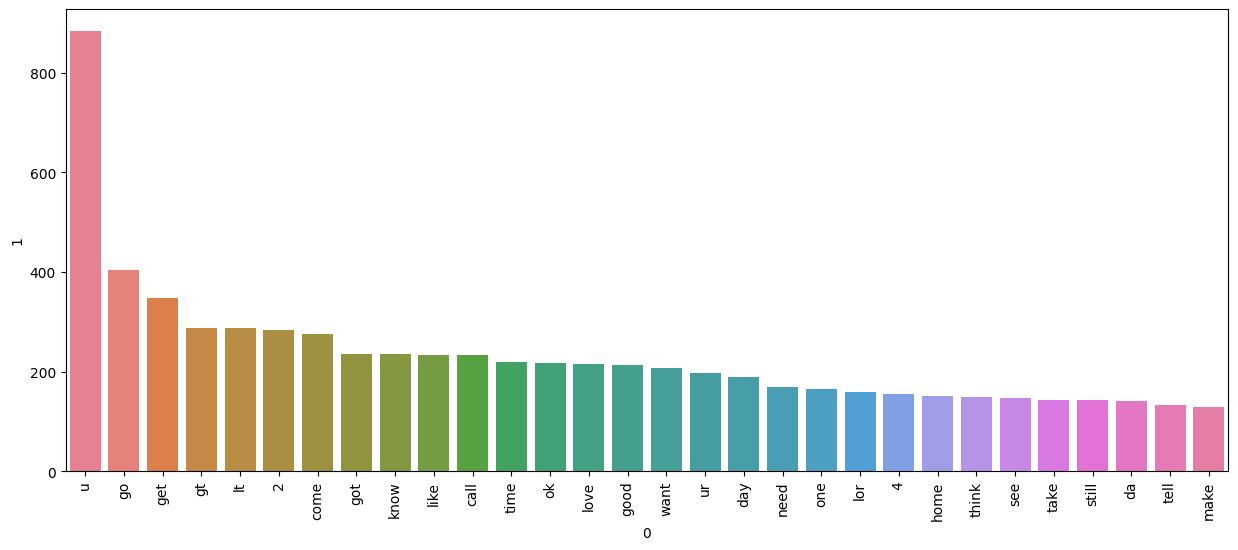

In [131]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

plt.figure(figsize = (15,6))
sns.barplot(data=ham_df,x=ham_df[0],y=ham_df[1]
            ,hue=ham_df[0])
plt.xticks(rotation = 'vertical')
plt.show()


## 4. MODEL BUILDING

In [164]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# X = cv.fit_transform(df['transformed_text']).toarray()

X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [183]:
## You can try scaling using min max scaler 
## from sklearn.preprocessing import MinMaxScaler
## scaler = MinMaxScaler()

## X = scaler.fit_transform(X)


In [165]:
X.shape


(5169, 3000)

In [166]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)


In [168]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [170]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [189]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [172]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [173]:
# TFIDF -
# MultinomialNB


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [177]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier(n_jobs=-1)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1',n_jobs=-1)
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2,n_jobs=-1)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2,n_jobs=-1)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2,n_jobs=-1)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)


In [178]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [180]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [181]:
from tqdm import tqdm
accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


  9%|▉         | 1/11 [00:05<00:53,  5.34s/it]

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


 18%|█▊        | 2/11 [00:05<00:21,  2.43s/it]

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0


 36%|███▋      | 4/11 [00:06<00:07,  1.02s/it]

For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
 55%|█████▍    | 6/11 [00:07<00:03,  1.27it/s]

For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


 64%|██████▎   | 7/11 [00:10<00:05,  1.41s/it]

For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


 73%|███████▎  | 8/11 [00:43<00:29,  9.79s/it]

For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659


 82%|████████▏ | 9/11 [00:46<00:15,  7.96s/it]

For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


 91%|█████████ | 10/11 [00:53<00:07,  7.75s/it]

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


100%|██████████| 11/11 [00:54<00:00,  4.94s/it]

For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [161]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)


In [162]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [163]:
# improve model
# 1. Change the max_features parameter of TfIdf


In [182]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending = False)

performance_df.merge(temp_df,on = 'Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [184]:
# Voting Classifier
svc = SVC(kernel = 'sigmoid', gamma = 1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2,n_jobs=-1)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)],voting = 'soft')
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50, n_jobs=-1,
                                                   random_state=2))],
                 voting='soft')

In [185]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [186]:
# Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()


In [187]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [190]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
